In [69]:
install.packages(c("mda","ISLR","plotmo"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("plotmo")


In [70]:
library(MASS);
library(mda);
library(plotmo);

In [71]:
library(ISLR)
head(Carseats)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [72]:
smp_size <- floor(0.67 * nrow(Carseats))

set.seed(123)
train_ind <- sample(seq_len(nrow(Carseats)), size = smp_size)

train <- Carseats[train_ind, ]
test <- Carseats[-train_ind, ]

In [73]:


# Preparar los datos
X <- Carseats %>% select(-Sales)
y <- Carseats$Sales

# Crear variables dummy
X <- model.matrix(~., data = X)[, -1]

# Dividir en conjunto de entrenamiento y prueba
set.seed(42)
train_index <- sample(1:nrow(X), size = 0.8 * nrow(X))  # Selección aleatoria de índices
X_train <- X[train_index, ]
X_test <- X[-train_index, ]
y_train <- y[train_index]
y_test <- y[-train_index]



In [74]:
# Instalar y cargar el paquete 'earth' para MARS
install.packages("earth")
library(earth)

# Escalar los datos
X_train_scaled <- scale(X_train)
X_test_scaled <- scale(X_test, center = attr(X_train_scaled, "scaled:center"), scale = attr(X_train_scaled, "scaled:scale"))

# Crear un data frame para la entrada en el modelo
train_data <- data.frame(X_train_scaled)
train_data$y <- y_train  # Asegurarse de agregar la variable de respuesta al data frame

# Ajustar el modelo MARS
mars_model <- earth(y ~ ., data = train_data)

# Ver resumen del modelo MARS
summary(mars_model)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Call: earth(formula=y~., data=train_data)

                          coefficients
(Intercept)                  2.6435012
ShelveLocGood                1.9768078
ShelveLocMedium              0.9615731
h(-0.458512-CompPrice)      -1.3188725
h(CompPrice- -0.458512)      1.5623943
h(1.64482-Income)           -0.4367338
h(-0.521133-Advertising)    -0.8234294
h(Advertising- -0.521133)    0.7358744
h(1.79561-Price)             2.2326896
h(Price-1.79561)            -2.6687535
h(0.489163-Age)              0.6950675
h(Age-0.489163)             -0.7656649

Selected 12 of 17 terms, and 7 of 11 predictors
Termination condition: RSq changed by less than 0.001 at 17 terms
Importance: ShelveLocGood, Price, CompPrice, Advertising, ShelveLocMedium, ...
Number of terms at each degree of interaction: 1 11 (additive model)
GCV 1.195305    RSS 329.4896    GRSq 0.8473374    RSq 0.8676682

In [75]:
# Verificar nombres de columnas
colnames(X_train_scaled)
colnames(X_test_scaled)


[1] "CompPrice"       "Income"          "Advertising"     "Population"     
 [5] "Price"           "ShelveLocGood"   "ShelveLocMedium" "Age"            
 [9] "Education"       "UrbanYes"        "USYes"

[1] "CompPrice"       "Income"          "Advertising"     "Population"     
 [5] "Price"           "ShelveLocGood"   "ShelveLocMedium" "Age"            
 [9] "Education"       "UrbanYes"        "USYes"

MSE del modelo MARS: 0.9740194 


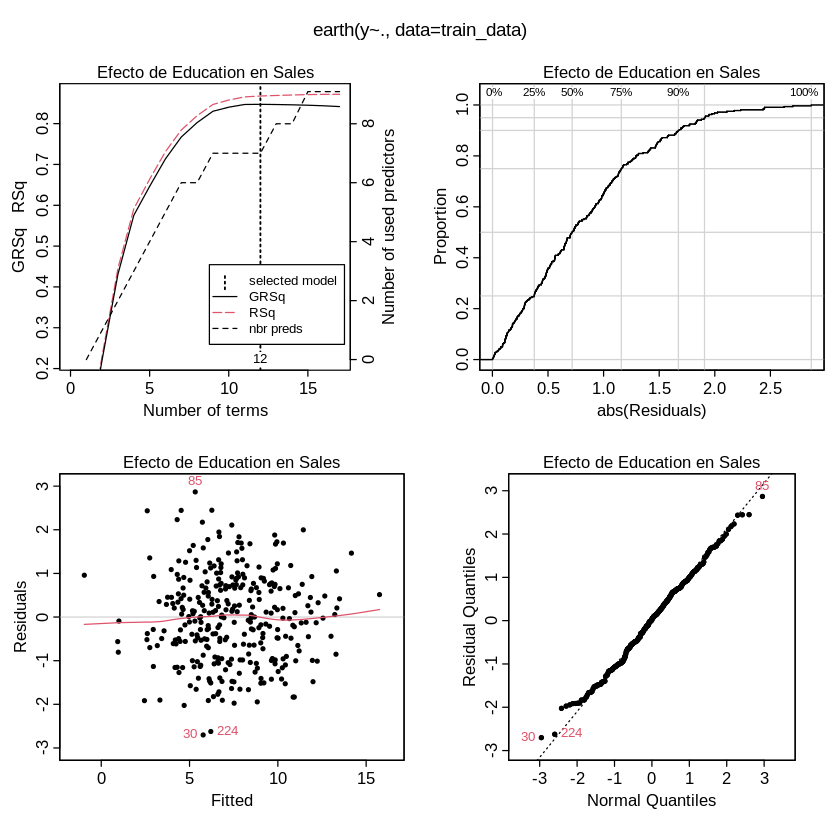

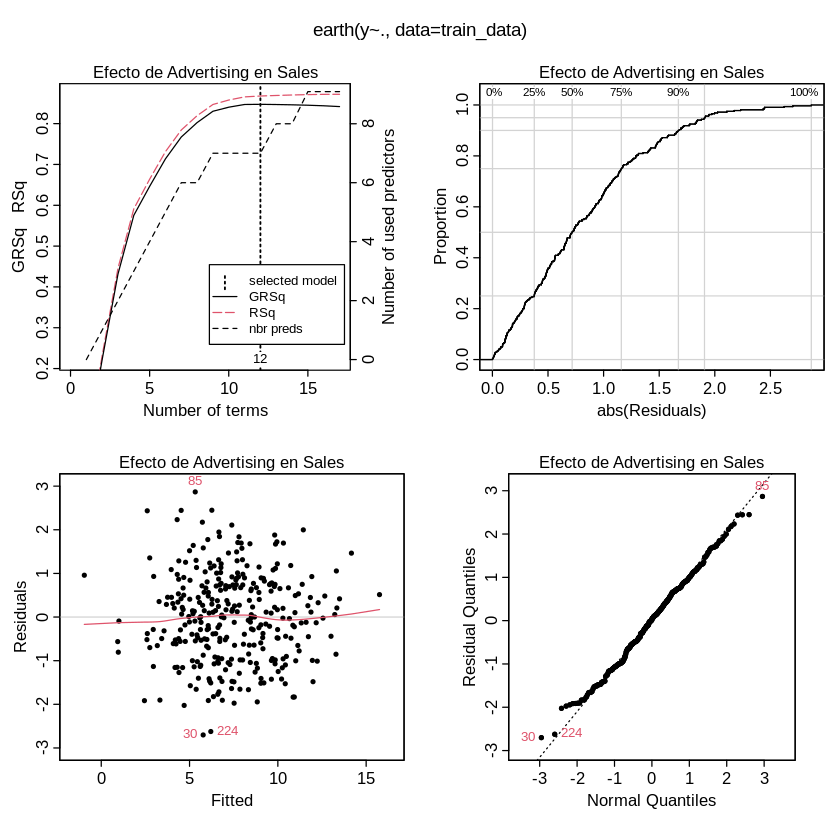

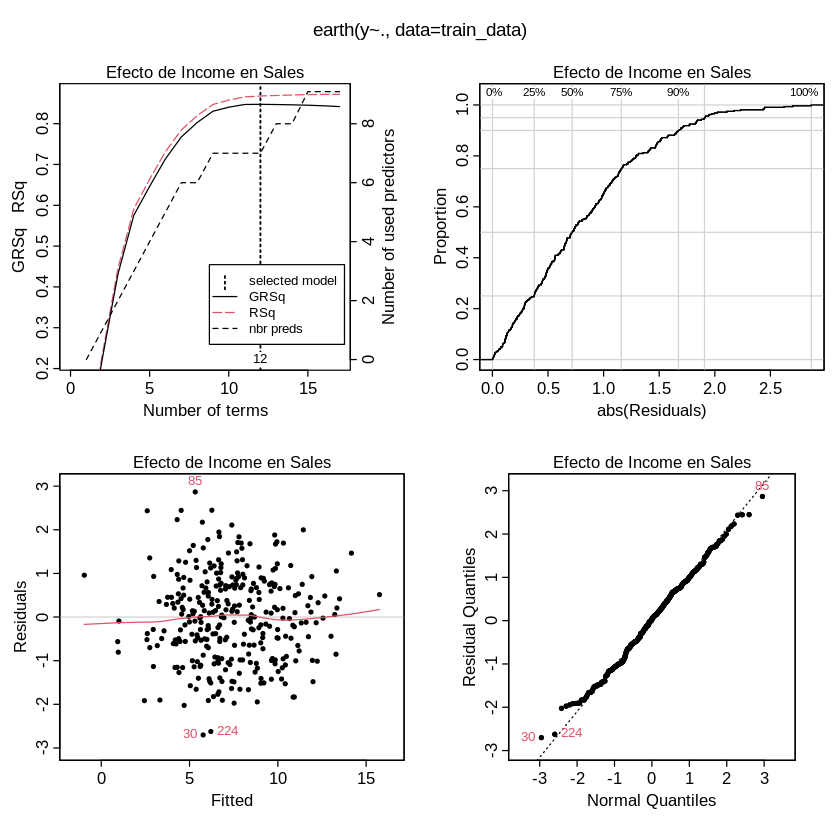

In [84]:
# Predicción con el modelo MARS
y_pred_mars <- predict(mars_model, newdata = X_test_scaled)

# Calcular MSE
mse_mars <- mean((y_test - y_pred_mars)^2)
cat("MSE del modelo MARS:", mse_mars, "\n")

# Graficar los efectos parciales para las variables seleccionadas
predictors <- c('Education', 'Advertising', 'Income')  # Variables a graficar

# Graficar los efectos parciales de las variables seleccionadas
for (i in 1:length(predictors)) {
  # Graficar el efecto parcial de cada predictor
  plot(mars_model, term = predictors[i], main = paste("Efecto de", predictors[i], "en Sales"))
}
